In [1]:
"""
Probablistic Machine Learning - Task List 2
"""

%matplotlib inline
import math

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import pandas as pd

from matplotlib import animation, rc
from IPython.display import HTML

In [11]:
def make_gaussian_rnd(mu, sigma):
    while True:
        yield np.random.normal(mu, sigma*sigma)

def generate_numbers_for_all_rnds(parameters, nb_numbers):
    generated_nums = []
    for param in parameters:
        rnd = make_gaussian_rnd(param['mu'], param['sigma'])
        generated_nums.append(
            [next(rnd) for _ in range(nb_numbers)]
        )
    return generated_nums

def make_combined_rnd_parameters(parameters):
    mus = [p['mu'] for p in parameters]
    sigmas = [p['sigma'] for p in parameters]
    
    joint_mu = sum(mus)
    joint_sigma = math.sqrt(sum(map(lambda x: x*x, sigmas)))
    
    return dict(mu=joint_mu, sigma=joint_sigma)

def get_mean_values(generated_nums, nb_numbers):
    all_means = []
    
    for nums in generated_nums:
        curr_means = []
        for idx in range(nb_numbers):
            curr_means.append(np.mean(nums[:idx + 1]))
        all_means.append(curr_means)
    
    return all_means

def get_variance_values(generated_nums, nb_numbers):
    all_vars = []
    
    for nums in generated_nums:
        curr_vars = []
        for idx in range(nb_numbers):
            curr_vars.append(np.std(nums[:idx + 1], ddof=1))
        all_vars.append(curr_vars)
    
    return all_vars

def visualize(parameters, nb_numbers):
    print(parameters)
    generated_nums = generate_numbers_for_all_rnds(parameters, nb_numbers)
    means = get_mean_values(generated_nums, nb_numbers)
    variances = get_variance_values(generated_nums, nb_numbers)
    frames = range(1, nb_numbers, 500)

    fig, plots = plt.subplots(len(parameters), 3, figsize=(10, 8))
    fig.tight_layout()
    
    ####### SHARE X-AXIS FOR HISTOGRAMS
    h_plots = np.array(plots)[:, 0]
    h_plots[0].get_shared_x_axes().join(*h_plots)
    #####

    def animate(curr_step):            
        for idx, row in enumerate(plots):
            h, m, v = row
            h.clear()
            m.clear()
            v.clear()
            
            h.hist(generated_nums[idx][:curr_step], rwidth=0.5, normed=True)
    
            m.plot(np.linspace(0, curr_step, curr_step), means[idx][:curr_step])
            m.plot(np.linspace(0, nb_numbers, nb_numbers), [parameters[idx]['mu']] * nb_numbers)
            
            v.plot(np.linspace(0, curr_step, curr_step), variances[idx][:curr_step])
            v.plot(np.linspace(0, nb_numbers, nb_numbers), [pow(parameters[idx]['sigma'],2)] * nb_numbers)

    anim = animation.FuncAnimation(fig, animate, 
                                   frames=frames,
                                   interval=50)
    return anim

[{'mu': -5, 'sigma': 1}, {'mu': 5, 'sigma': 1}, {'mu': 0, 'sigma': 2}, {'mu': 0, 'sigma': 2.449489742783178}]


/Users/peter/Desktop/INF_DAN/PUMa/lab_venv/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/peter/Desktop/INF_DAN/PUMa/lab_venv/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


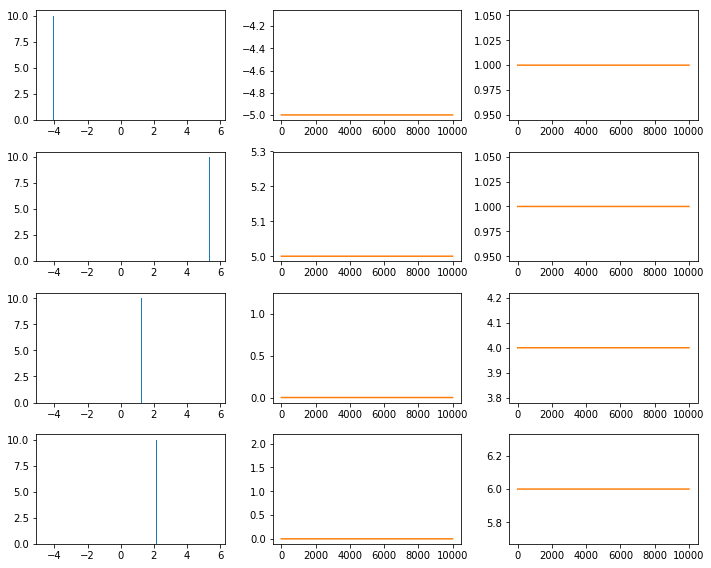

In [14]:
# --------- EXERCISE 1 -------------------
NB_NUMBERS = 10000

parameters = [
    dict(mu=-5, sigma=1),
    dict(mu=5, sigma=1),
    dict(mu=0, sigma=2),
]

parameters.append(make_combined_rnd_parameters(parameters))

anim = visualize(parameters, NB_NUMBERS)
HTML(anim.to_jshtml())

#### Exercise 2
Bernoulli scheme: $$ P_n(k) = \binom{n}{k} \; * \; p^k \; * \; q^{n-k} $$
where:<br>
$p$ - prob. of success,<br>
$q$ - prob. of failure,<br>
$n$ - number of tries,<br>
$k$ - number of successes,<br>

In this exercise we have: <br>
*success* $\to$ student gets rejected ($p = 0.99$)<br>
*failure* $\to$ student is accepted for the chosen faculty ($q = 0.01$)<br>
$n = 9$ (number of faculties)<br>
$k = 9$ (number of rejects / successes)<br>

Therefore:
$$ P_9(9) = \binom{9}{9} \; * \; 0.99^9 \; * \; 0.01^0 = 1 * 0.99^9 * 1 = 0.99^9$$ 
$$ P_9(9) = 0.99^9 = 0.9135172475$$ 

Answer: **The probability that the student could be rejected on all faculties is around 91%.**

In [5]:
def calculate_prob_all_rejected(p, n):
    """
    p - probability of getting rejected on one faculty,
    n - number of faculties
    """
    return math.pow(p, n)

PROB_REJECT_ONE = 0.99
NUM_FACULTIES = 9

prob_all_rejected = calculate_prob_all_rejected(PROB_REJECT_ONE, NUM_FACULTIES)
print('Probability that the student was rejected on all faculties:', 
      prob_all_rejected, 
      ' ->', 
      round(100*prob_all_rejected, 2), 
      '%')

Probability that the student was rejected on all faculties: 0.9135172474836408  -> 91.35 %


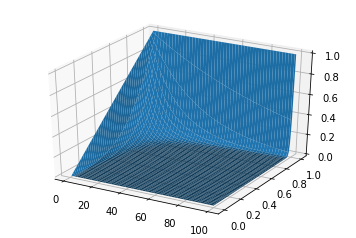

In [6]:
import itertools

from mpl_toolkits.mplot3d import Axes3D

num_fac = np.linspace(1, 100, 100)
prob_reject_one = np.linspace(0, 1, 100)

prob_reject_all = []

X, Y = np.meshgrid(num_fac, prob_reject_one)

for f, p in zip(np.ravel(X), np.ravel(Y)):
    prob_reject_all.append(calculate_prob_all_rejected(p, f))
  
Z = np.array(prob_reject_all).reshape(X.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

#### Exercise 3
Multinomial can't be used here, as the restriction that $p_1 + p_2 + ... + p_k = 1$ makes no sense in this particular case. Each event (student's trial to apply for a given faculty) is a binomial distribtion $P_{1,i}(1)$, parametrized with a probability $p_i$. Therefore the total probability is equal to: <br>
$$ P = P_{1,1}(1) *P_{1,2}(1) * ... * P_{1,k}(1) $$ <br>
$$ P_{1, i}(1) = \binom{1}{1} * p_i^1 * (1 - p_i)^{1-1} = 1 * p_i * 1 = p_i $$ <br>
$$ P = p_1 * p_2 * ... * p_k $$


In [21]:
def calculate_prob_all_rejected_multi(p):        
    return np.prod(p)


prob_all_rejected = calculate_prob_all_rejected_multi(
    [0.99, 0.98, 0.95, 0.85, 0.87, 0.99, 0.65, 0.88, 0.99]
)
print('Probability that the student was rejected on all faculties:', 
      prob_all_rejected, 
      ' ->', 
      round(100*prob_all_rejected, 2), 
      '%')

Probability that the student was rejected on all faculties: 0.38211093999678597  -> 38.21 %
